# Thera Bank Personal Loan Campaign

## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

## Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Attribute Information:

    * ID : CustomerID
    * Age: Customer's age in completed years
    * Experience: #years of professional experience
    * Income: Annual income of the customer(000)
    * ZIP Code: Home Address ZIPcode.
    * Family: Family size of the customer
    * CCAvg: Avg. spending on credit cards per month(000)
    * Education: Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional
    * Mortgage: Value of house mortgage if any.(000)
    * PersonalLoan:Did this customer accept the personal loan offered in the last campaign?
    * SecuritiesAccount: Does the customer havea securities account with the bank?
    * CDAccount: Does the customer havea certificate of deposit (CD) account with thebank?
    * Online: Does the customer use internet banking facilities?
    * Creditcard:Does the customer use a creditcard issued by the bank?


----------------------

## <font size="7">`Index`</font>

----------------------
- <a href = #link1><font size="5">Import Libraries and Load Dataset</font> </a>
- <a href = #link2><font size="5">Exploratory Data Analysis - Univariate </font> </a>
- <a href = #link3><font size="5">Number of unique in each column </font> </a>
- <a href = #link4><font size="5">Number of people with zero mortgage </font> </a>
- <a href = #link5><font size="5">Number of people with zero credit card spending per month </font> </a>
- <a href = #link6><font size="5">Value counts of all categorical columns </font> </a>
- <a href = #link7><font size="5">Data Wrangling - Identifying and correcting bad data </font> </a>
- <a href = #link8><font size="5">Outlier Identification and remediation </font> </a>
- <a href = #link9><font size="5">Exploratory Data Analysis - Bivariate  </font> </a>
- <a href = #link10><font size="5">EDA - Bivariate Zip Code vs Personal Loan  </font> </a>
- <a href = #link11><font size="5">EDA - Categorical Variable vs Personal Loan  </font> </a>
- <a href = #link12><font size="5">Split the data into training and test set in the ratio of 70:30 </font> </a>
- <a href = #link13><font size="5">Model Performance Evaluation Metrics </font> </a>
- <a href = #link14><font size="5">Logistic Regression Parameter Evaluation on Model </font> </a>
- <a href = #link15><font size="5">Business Insight  </font> </a>

## <a id = "link1"></a> Import Libraries and Load Dataset

In [1]:
#!conda install -c conda-forge --yes geopy

In [2]:

#Import the required libraries required to achieve the objective 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split

# For getting the latitude and longitude for list of Zip Code provided in the sample data
from geopy.geocoders import Nominatim

# For mapping the latitude and longitude over the map and visualizing the area 
import folium


In [3]:
# Setting the environment to display all the rows 
pd.set_option('display.max_rows', None)

# Setting the environment to display all the columns 
pd.set_option('display.max_columns', None)

In [4]:
#Load the input Thera Bank Customer data into dataframe 
df_cust_info = pd.read_csv(r'Bank_Personal_Loan_Modelling.csv')

In [5]:
#Check the first five rows present in the dataframe 
df_cust_info.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## <a id = "link2"></a> Exploratory Data Analysis - Univariate 

In [6]:
# Check the information about the data in terms what is the data type and whether any of the fields is having null values
df_cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Data Insight from the Info of the dataframe 

1. None of the field is having null values in the dataframe
2. None of the field is of object type 
3. All the fields is either Integer or Float Type. There are 13 columns of integer and 1 column is of float type
4. There are 5000 rows and 14 columns 

In [7]:
#Check the shape of the dataframe
df_cust_info.shape

(5000, 14)

In [8]:
#Checking the column having null values 
df_cust_info.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

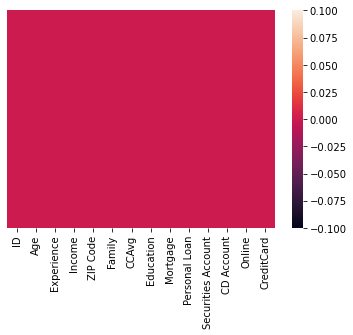

In [9]:
sns.heatmap(df_cust_info.isnull(),yticklabels=False)

## <a id = "link3"></a> Number of unique in each column

In [10]:
#Check number of unique value in each field of dataframe
df_cust_info.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Data Insight - From the number of unique data present in the each field, below fields seems to be categorical fields 

1. Family
2. Education
3. Personal Loan
4. Securities Account
5. CD Account
6. Online
7. CreditCard

In [11]:
df_cust_info.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

### Below are the observations 

1. Infering from standard Deviation, 3rd Quartile, Minumum  and Maximum data 
    * Income, CCAvg, Mortage field is highly skewed data and may have outliers 
    
    
    
2. Infering from the "Experience" which should be either 0 or greater than 0 but it has minimum value which is negative -3. 
    * The "Experience" field needs to be explored more. 

### Data Insight 
Mortgage, Personal Loan, Securities Account and CD Account is highly skewed data and 

In [12]:
# Find out are there any customer who are not liability customer meaning who from the sample who dont have either 
# Securities Account and CD Account 
df_cust_info[( df_cust_info['Securities Account'] == 1 ) | ( df_cust_info['CD Account'] == 1 )].shape

(677, 14)

In [13]:
df_cust_info[( df_cust_info['Personal Loan'] == 1 ) & (( df_cust_info['Securities Account'] == 1 ) | ( df_cust_info['CD Account'] == 1 ))].shape

(149, 14)

In [14]:
df_cust_info[( df_cust_info['Personal Loan'] == 1 ) & (( df_cust_info['Securities Account'] == 0 ) & ( df_cust_info['CD Account'] == 0 ))].shape

(331, 14)

In [15]:
df_lib_cust = df_cust_info[( df_cust_info['Securities Account'] == 1 ) | ( df_cust_info['CD Account'] == 1 )].reset_index(drop=True)

In [16]:
df_lib_cust

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0       1   25           1      49     91107       4   1.60          1   
1       2   45          19      34     90089       3   1.50          1   
2      13   48          23     114     93106       2   3.80          3   
3      15   67          41     112     91741       1   2.00          1   
4      20   55          28      21     94720       1   0.50          2   
5      24   44          18      43     91320       2   0.70          1   
6      30   38          13     119     94104       1   3.30          2   
7      39   42          18     141     94114       3   5.00          3   
8      41   57          32      84     92672       3   1.60          3   
9      48   37          12     194     91380       4   0.20          3   
10     51   32           8       8     92093       4   0.70          2   
11     57   55          30      29     94005       3   0.10          2   
12     61   49          24      39     90404       3   1.70          2   
13     62   47          21     125     93407       1   5.70          1   
14     68   53          23      45     95123       4   2.00          3   
15     76   31           7     135     94901       4   3.80          2   
16     94   60          34      64     94550       2   1.70          3   
17    106   24           0      35     94704       3   0.10          2   
18    124   37          13      84     92130       1   3.60          2   
19    129   38          14      74     92182       2   0.00          1   
20    132   58          34     149     93720       4   7.20          2   
21    139   59          34      42     94928       3   1.50          1   
22    151   46          22     118     94107       2   7.50          1   
23    154   60          36      22     94551       2   1.00          1   
24    160   61          35      41     94545       4   1.70          2   
25    165   53          27      92     95120       2   1.10          1   
26    172   52          28      11     95817       3   0.40          1   
27    176   45          20      85     91711       4   1.10          2   
28    185   52          26      63     92717       2   1.50          2   
29    196   34          10      13     94577       4   1.00          1   
30    199   27           3      59     94123       4   0.00          1   
31    200   36          11     158     92152       1   5.10          3   
32    207   49          25      31     91355       1   1.00          1   
33    210   64          39     172     94707       4   3.10          1   
34    228   47          23     148     94551       2   7.50          1   
35    229   47          22      53     92677       4   1.90          3   
36    244   65          39     170     90095       3   7.90          3   
37    248   53          29     120     92626       4   2.70          2   
38    263   49          23      33     90245       1   0.30          3   
39    266   49          23      23     94305       4   0.60          3   
40    275   30           5      74     95616       4   2.20          1   
41    276   49          24      50     94706       4   1.80          3   
42    284   61          36      40     90029       3   0.50          2   
43    289   44          19     172     94306       2   4.30          3   
44    300   41          15     159     90057       1   5.50          3   
45    301   34           9      70     92843       4   1.30          1   
46    309   32           8     128     94720       2   4.33          1   
47    310   62          38      91     95929       1   3.80          1   
48    313   36           6      21     91741       1   0.67          3   
49    323   63          39     101     92007       1   3.90          1   
50    327   52          27      80     95616       1   1.30          3   
51    336   56          32     122     95827       2   0.30          1   
52    346   51          27      12     92192       4   0.50          2   
53    348  

#### Data Insight 

By defenition libality customer are those to whom bank owns some kind of financial asset which they are bound to pay back. Asumption that I am making here is "Securities Account" and "CD Account" are the two properties which helps in identifying whether customer is libality customer or not.

1. 677 are those customers where bank has some libalities towards customer.   
1. 149 are those customers where bank has some libalities towards customer and customers have accepted personnel loan
2. 331 are those customers where bank has no libalities and customers have not accepted personnel loan

## Below analysis is with assumption all the 5000 customers are liability customers 

In [17]:
df_cust_info['Family'].unique().tolist()

[4, 3, 1, 2]

In [18]:
df_cust_info['Education'].unique().tolist()

[1, 2, 3]

In [19]:
df_cust_info['Personal Loan'].unique().tolist()

[0, 1]

In [20]:
df_cust_info['Securities Account'].unique().tolist()

[1, 0]

In [21]:
df_cust_info['CD Account'].unique().tolist()

[0, 1]

In [22]:
df_cust_info['Online'].unique().tolist()

[0, 1]

In [23]:
df_cust_info['CreditCard'].unique().tolist()

[0, 1]

### Data Insight 

1. Four Categories in the family identifying number of family members ranging from 1 to 4
2. 3 Level of education level 
3. Personal Loan value of 0 and 1 stating whether customer has taken loan or not 
4. Securities Account value of 0 and 1 stating whether customer has securities account or not 
5. CD Account value of 0 and 1 stating whether customer has CD account or not 
6. Online value of 0 and 1
7. CreditCard value of 0 and 1 stating whether customer has Credit Card or not 

All the above are categorical fields and data type of it can be converted to Category

In [24]:
df_cust_info['Family']             = df_cust_info['Family'].astype('category')
df_cust_info['Education']          = df_cust_info['Education'].astype('category')
df_cust_info['Personal Loan']      = df_cust_info['Personal Loan'].astype('category')
df_cust_info['Securities Account'] = df_cust_info['Securities Account'].astype('category')
df_cust_info['CD Account']         = df_cust_info['CD Account'].astype('category') 
df_cust_info['Online']             = df_cust_info['Online'].astype('category')
df_cust_info['CreditCard']         = df_cust_info['CreditCard'].astype('category')

In [25]:
df_cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.5 KB


In [26]:
df_cust_info.skew(axis = 0, skipna = True)

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

#### After converting the 7 fields from Int64 to category, the memory usgaes dropped from 547 kb to 308 kb.So, converting the fields into category helping to reduce the memory usages


## <a id = "link4"></a> Number of people with zero mortgage

In [27]:
df_cust_info[df_cust_info['Mortgage'] == 0 ]['Mortgage'].value_counts()

0    3462
Name: Mortgage, dtype: int64

## <a id = "link6"></a> Number of people with zero credit card spending per month

In [28]:
df_cust_info[df_cust_info['CreditCard'] == 0 ]['CCAvg'].mean()*1000

1945.4815864022723

## <a id = "link6"></a> Value counts of all categorical columns

In [29]:
for i in list(df_cust_info.columns[df_cust_info.dtypes=='category']):   # checking value counts of all object type columns
    print(df_cust_info[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


## <a id = "link7"></a> Data Wrangling - Identifying and Correcting bad data  

In [30]:
# Assumption made here while correcting the Experience data is experience is linked to age of the customer. 
# Check what is the mean experience for a given age where the experience is negative and replace the experience with mean value 
# if the mean value is greater than 0 and 0 if the mean value is less than 0 

for ind in df_cust_info[df_cust_info['Experience'] < 0 ]['Age'].unique().tolist():
    print("Age ",ind)
    
    mean_exp = round(df_cust_info[df_cust_info['Age'] == ind ]['Experience'].mean())
    
    list_a = df_cust_info[ ( df_cust_info['Age'] == ind ) & ( df_cust_info['Experience'] < 0 ) ].index.values.tolist()
    
    print(list_a)
    
    if mean_exp < 0:
        print(0)
        df_cust_info.loc[list_a,'Experience'] = 0
    else:
        print(mean_exp)
        df_cust_info.loc[list_a,'Experience'] = mean_exp
        

Age  25
[89, 536, 540, 576, 649, 1428, 1522, 1905, 2102, 2545, 2980, 3284, 3292, 3394, 3946, 4015, 4481, 4582]
0
Age  24
[226, 315, 524, 583, 597, 686, 793, 889, 1173, 2466, 2848, 2876, 3626, 3796, 3887, 4116, 4514]
0
Age  28
[451]
3
Age  23
[670, 909, 2430, 2618, 2717, 2962, 3130, 3157, 3425, 3824, 4285, 4411]
0
Age  29
[3076, 4088, 4957]
4
Age  26
[3279]
1


In [31]:
#Checking if there are any rows having Experience negative
for ind in df_cust_info[ ( df_cust_info['Experience'] < 0 ) ].index.values.tolist():
    print(df_cust_info.loc[ind,'Experience'])

## <a id = "link8"></a> Outlier Identification and remediation

In [32]:
# Calculate the IQR for Income, CCAvg and Mortage
def find_iqr(df_cust_info):
  return np.subtract(*np.percentile(df_cust_info, [75, 25]))

In [33]:
df_cust_iqr = df_cust_info[['Income','CCAvg','Mortgage']].apply(find_iqr);
#iqr_CCAvg   = df_cust_info['CCAvg']
#iqr_Mortage = df_cust_info['Mortage'] 

In [34]:
df_cust_info[df_cust_info['Income'] > ((df_cust_info['Income'].quantile(.75) + df_cust_iqr['Income']) or ( df_cust_info['Income'].quantile(.25) - df_cust_iqr['Income'] ) )]['Income']

9       180
18      193
27      158
47      194
53      190
59      188
97      161
148     163
172     171
174     168
187     159
188     169
196     165
199     158
209     172
243     170
251     170
288     172
299     159
303     195
316     165
324     158
329     191
348     173
354     173
365     174
400     179
423     161
459     200
462     183
473     182
482     173
493     173
494     160
526     205
544     164
566     175
570     161
607     170
614     180
632     165
660     165
662     185
677     204
681     164
684     164
740     195
770     172
772     165
779     192
781     158
782     194
783     160
785     164
787     202
800     173
807     162
868     161
882     185
888     182
896     161
899     172
914     195
915     184
917     200
940     193
952     180
954     169
971     174
993     185
1014    192
1039    175
1067    195
1077    175
1084    191
1097    188
1104    181
1105    182
1111    183
1125    172
1128    171
1130    191
1149    158
1161

In [35]:
df_cust_info[df_cust_info['CCAvg'] > ((df_cust_info['CCAvg'].quantile(.75) + df_cust_iqr['CCAvg']) or ( df_cust_info['CCAvg'].quantile(.25) - df_cust_iqr['CCAvg'] ) )]['CCAvg']

9        8.90
16       4.70
18       8.10
38       5.00
44       5.70
48       4.50
55       8.00
59       4.50
61       5.70
72       5.00
90       5.60
96       5.20
119      4.60
131      7.20
145      7.40
150      7.50
151      6.50
160      6.50
172      7.80
174      7.90
194      6.80
196      5.00
199      5.10
213      7.40
227      7.50
243      7.90
251      6.20
290      4.90
299      5.50
301      6.90
302      7.50
308      4.33
311      7.30
321      4.40
323      4.40
324      6.10
329      6.33
348      6.60
351      5.30
358      4.33
361      7.50
365      6.80
389      7.00
400      6.60
402      4.90
422      6.30
423      7.50
432      5.70
462      8.30
463      5.50
474      6.90
475      6.10
479      6.00
482      4.60
494      8.00
509      6.80
526      6.33
537      4.90
541      4.33
544      7.80
554      7.20
570      6.50
577      6.80
587      4.90
589      6.00
597      7.20
614      8.60
615      6.90
636      6.10
641      7.80
650      5.10
681   

In [36]:
df_cust_info[df_cust_info['Mortgage'] > ((df_cust_info['Mortgage'].quantile(.75) + df_cust_iqr['Mortgage']) or ( df_cust_info['Mortgage'].quantile(.25) - df_cust_iqr['Mortgage'] ) )]['Mortgage']

22      260
39      285
42      412
47      211
52      207
53      240
59      455
66      336
93      236
112     309
119     366
127     251
130     276
177     244
187     315
209     282
212     209
215     249
242     280
248     264
251     325
261     251
288     391
303     617
320     248
327     402
335     360
338     392
354     419
362     270
365     466
374     220
405     290
431     224
459     458
473     547
479     470
486     304
510     221
515     211
522     224
526     271
528     378
540     314
546     203
552     230
570     485
584     300
587     272
604     240
606     208
610     275
625     211
629     218
640     327
645     322
653     205
664     227
670     239
671     282
678     207
679     364
684     449
688     207
698     220
730     205
751     355
764     314
782     587
802     214
805     307
816     263
840     310
847     252
863     265
883     305
888     372
891     301
894     232
895     289
896     212
903     250
909     305
915 

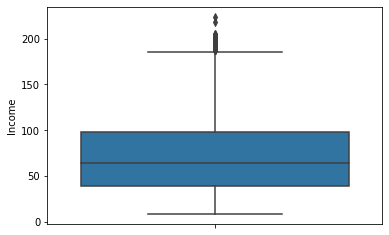

In [37]:
sns.boxplot(df_cust_info['Income'],orient = 'v');

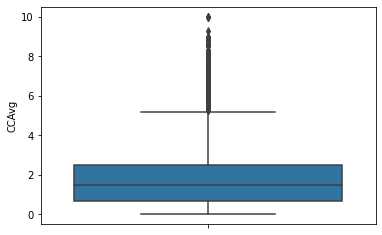

In [38]:
sns.boxplot(df_cust_info['CCAvg'],orient = 'v');

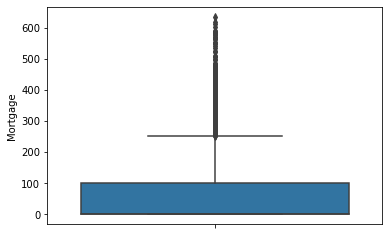

In [39]:
sns.boxplot(df_cust_info['Mortgage'],orient = 'v');

### Data Insight 
Almost there are 10% of data which are outliers present in the field Income, CCAvg and Mortgage. These are the fields which seems to be contributing towards the liability customer buying personal loans. So, instead of working to eliminate these outliers with either the whisker or with median, let keep it as it is. 

In [40]:
for i in list(df_cust_info.columns[df_cust_info.dtypes=='category']):   # checking value counts of all object type columns
    print(df_cust_info[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



## <a id = "link9"></a> Exploratory Data Analysis - Bivariate 

### Using the Seaborn Library's pairplot, lets look at the relationship between these variables except the ID and ZipCode fields 

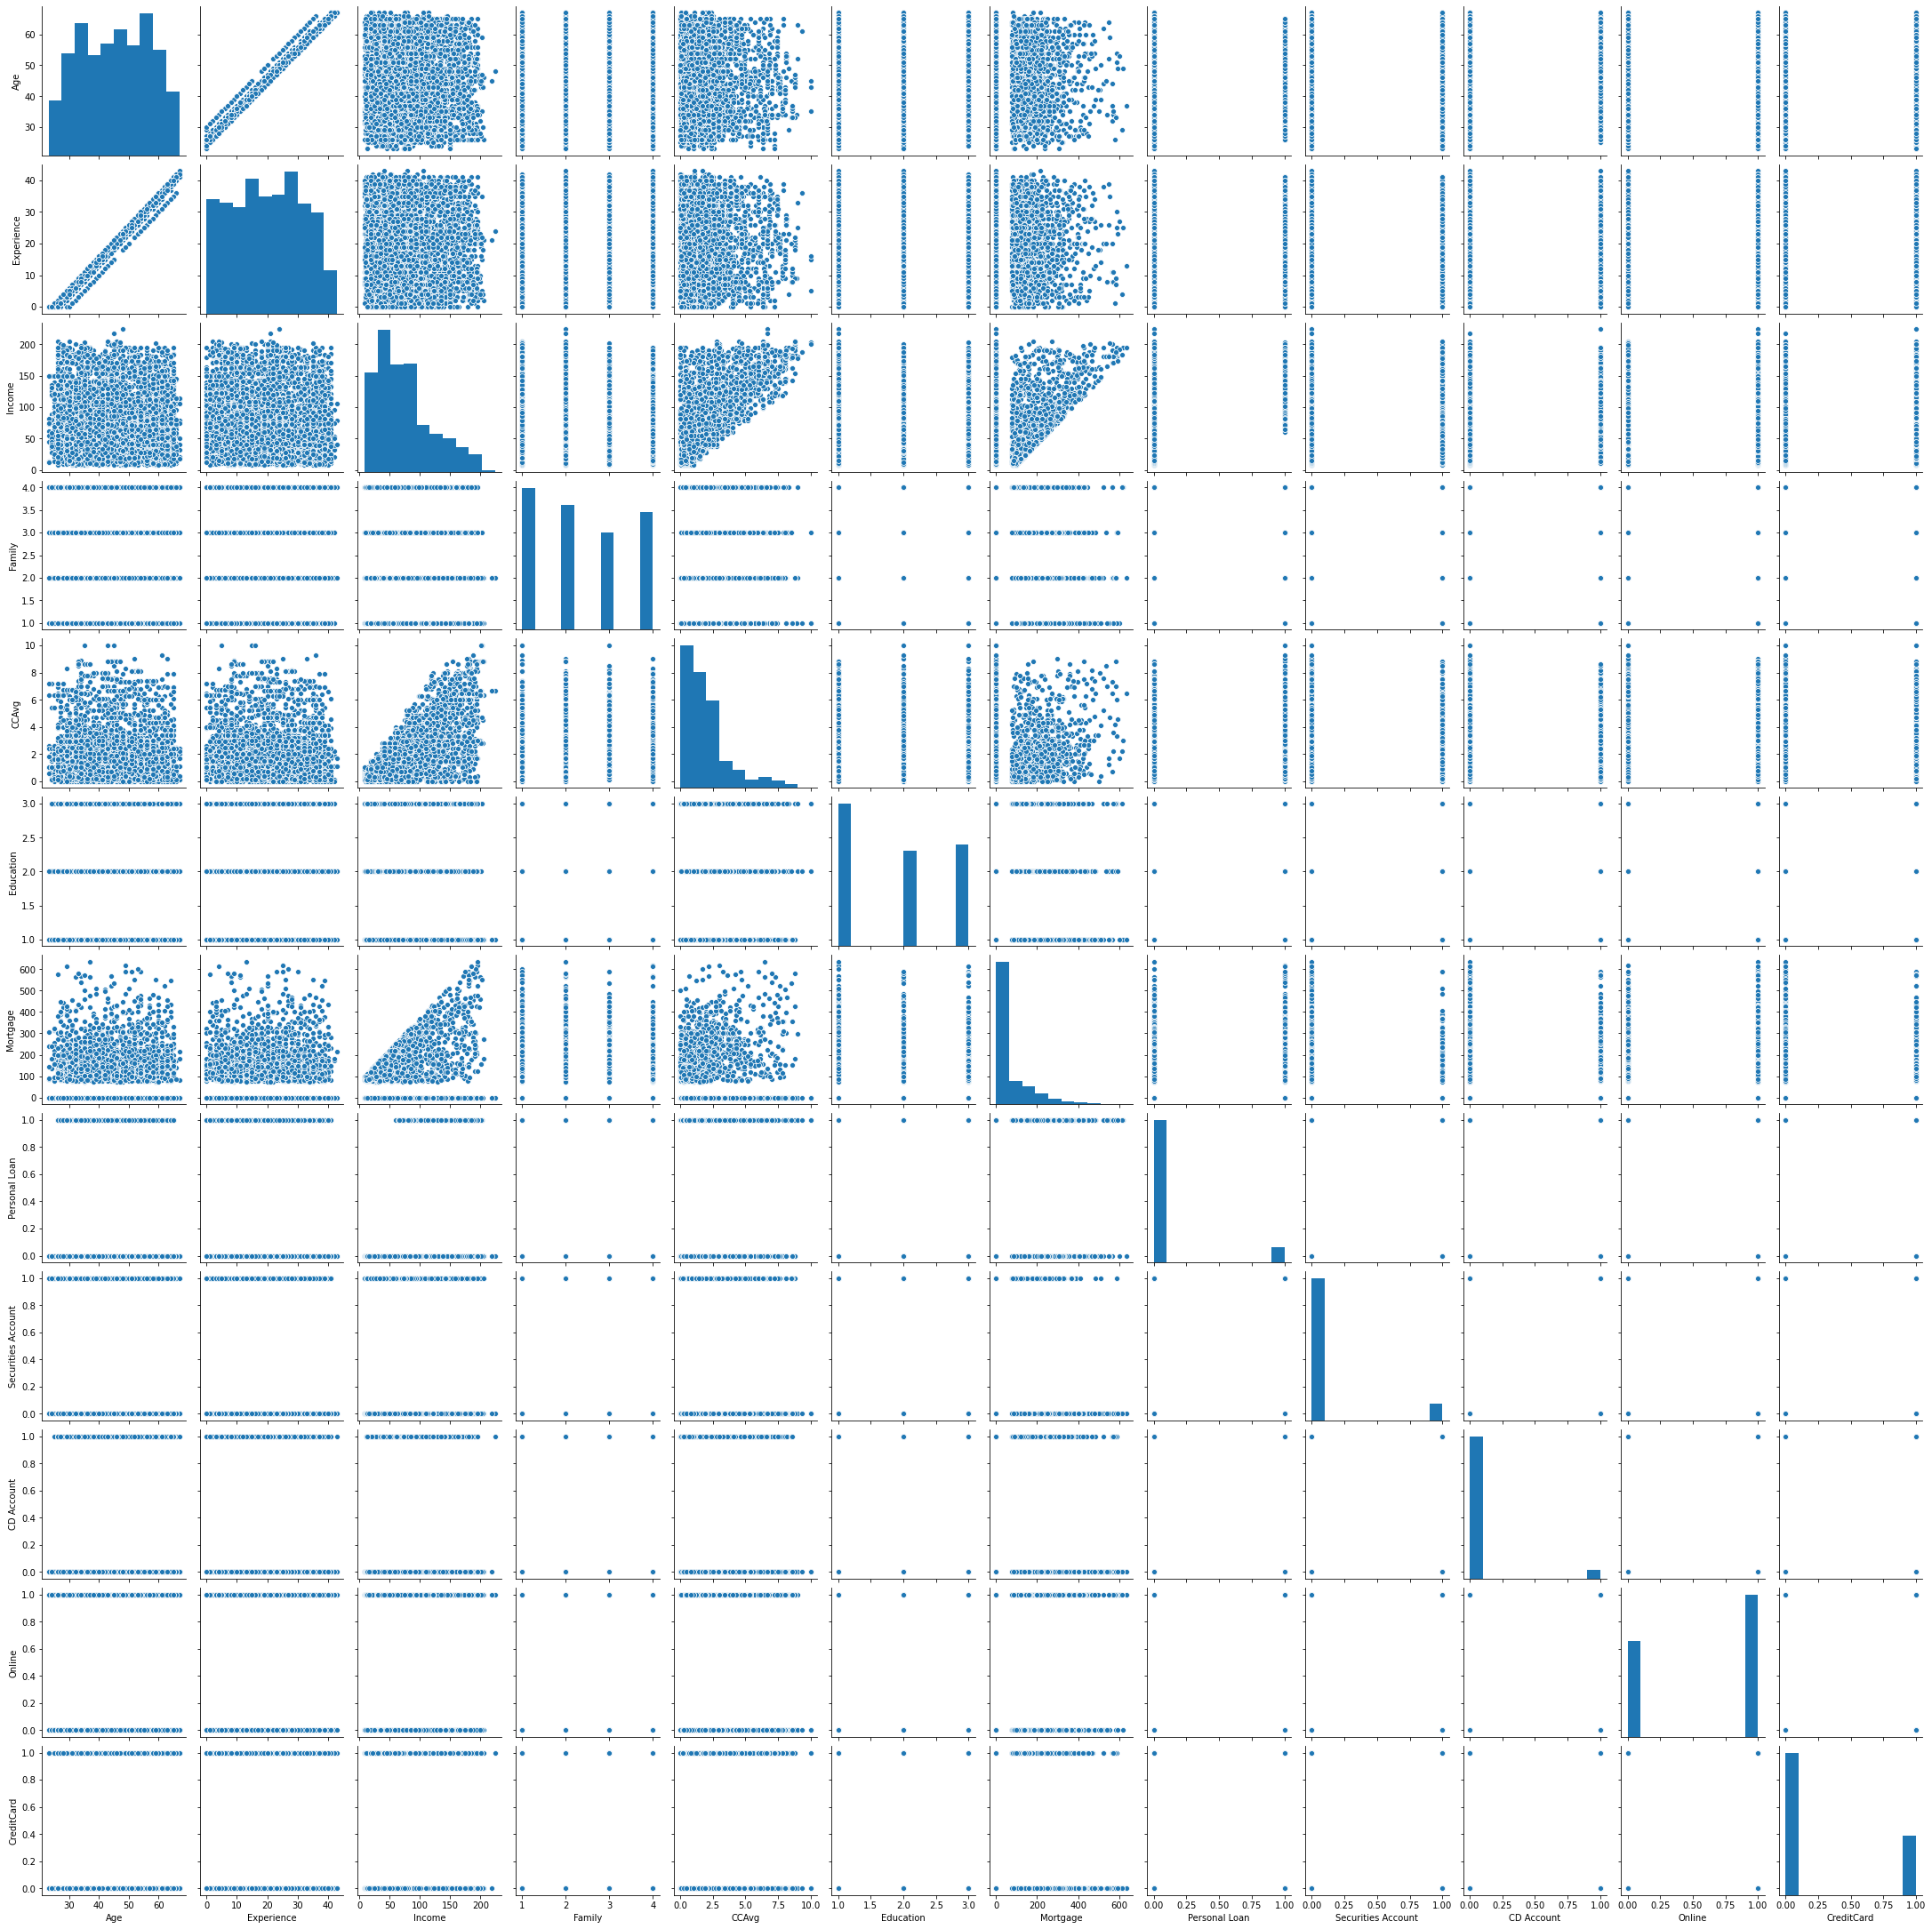

In [41]:
sns.pairplot(df_cust_info.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13]])

### Data Insight 
1. From the graph there is linear relationship between Age and Experience  
2. There seems to linear relationship between income & Mortgage
3. There seems to linear relationship between income & CC Average

In [42]:
df_cust_info['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

## <a id = "link10"></a>EDA - Bivariate Zip Code vs Personal Loan 
This is to find out what is the Personal Loan approval rating against each zipcode and if there is no impact of Zip Code over the Personal approval rating


In [43]:
# Check Whether Demographic has contributed towards approval of the loan
pd_App_loan_zip = pd.DataFrame(df_cust_info.groupby('ZIP Code')['Personal Loan'].count()).reset_index()

In [44]:
pd_App_loan_zip

ZIP Code  Personal Loan
0        9307              1
1       90005              5
2       90007              6
3       90009              8
4       90011              3
5       90016              2
6       90018              4
7       90019              5
8       90024             50
9       90025             19
10      90027              3
11      90028              8
12      90029              5
13      90032              8
14      90033              9
15      90034             20
16      90035              6
17      90036              7
18      90037              5
19      90041             10
20      90044              2
21      90045              3
22      90048              4
23      90049              9
24      90057              3
25      90058              6
26      90059              4
27      90064             14
28      90065              8
29      90066              6
30      90068              1
31      90071              6
32      90073              6
33      90086              3
34      90089             46
35      90095             71
36      90210             11
37      90212              8
38      90230              6
39      90232              5
40      90245             50
41      90250              9
42      90254              7
43      90266             19
44      90272              2
45      90274              5
46      90275              3
47      90277             16
48      90280              2
49      90291             18
50      90304              2
51      90401             20
52      90404              5
53      90405             10
54      90502              6
55      90503              8
56      90504              6
57      90505              3
58      90509              5
59      90601              4
60      90623              2
61      90630             17
62      90638              5
63      90639              4
64      90640              3
65      90650              3
66      90717             10
67      90720              5
68      90740             17
69      90745              2
70      90747              8
71      90755              3
72      90813              1
73      90840             18
74      91006              5
75      91007              5
76      91016              8
77      91024              1
78      91030              4
79      91040              6
80      91101              8
81      91103              9
82      91105              7
83      91107             25
84      91109              5
85      91116              6
86      91125              9
87      91129              2
88      91203              5
89      91207              2
90      91301              6
91      91302              9
92      91304             10
93      91311             17
94      91320             53
95      91326              2
96      91330             46
97      91335              9
98      91342              4
99      91343              3
100     91345              3
101     91355             12
102     91360             10
103     91361              4
104     91365              6
105     91367              6
106     91380             22
107     91401              6
108     91423              7
109     91604             15
110     91605             10
111     91614              4
112     91706              6
113     91709              6
114     91710              3
115     91711             52
116     91730              6
117     91741              6
118     91745              6
119     91754              5
120     91763              7
121     91765              6
122     91768             21
123     91770              5
124     91773              3
125     91775             12
126     91784              2
127     91791              4
128     91801              3
129     91902             10
130     91910              9
131     91911              6
132     91941              2
133     91942              7
134     91950              7
135     92007             13
136     92008             11
137

<AxesSubplot:ylabel='ZIP Code'>

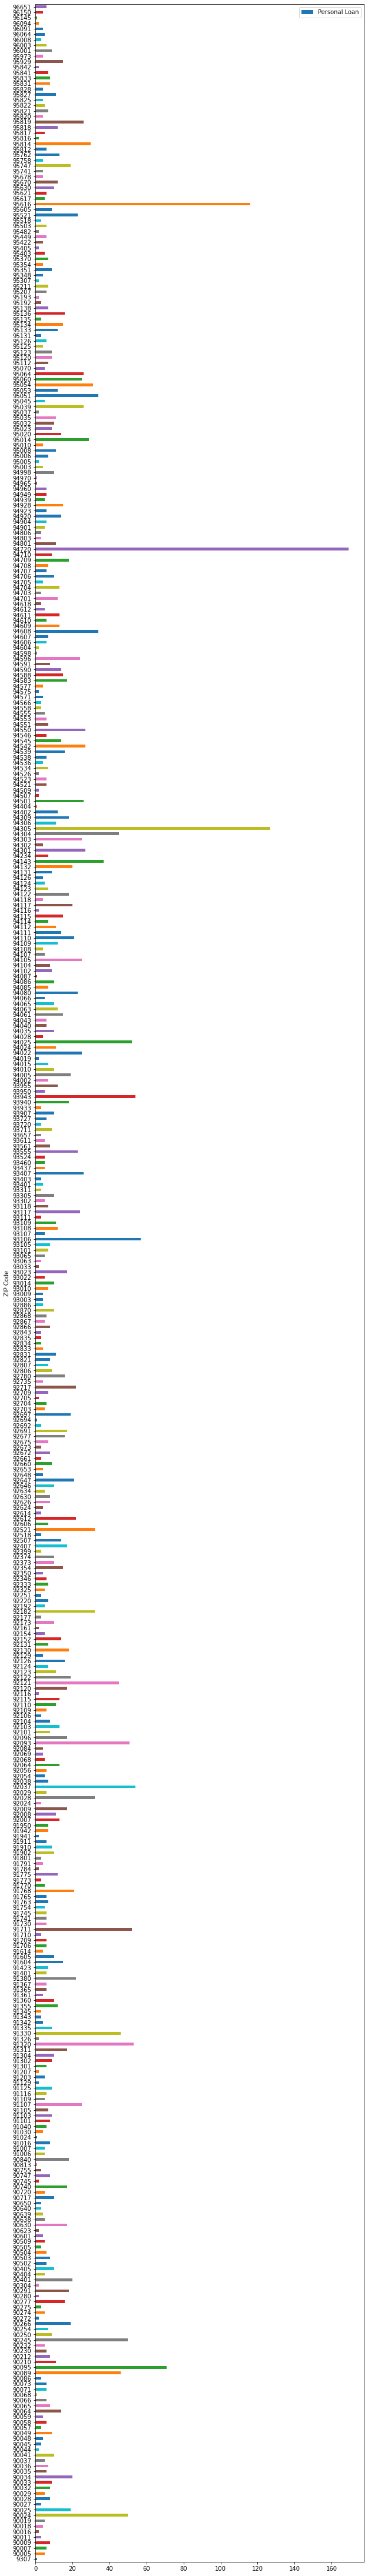

In [45]:
pd.DataFrame(df_cust_info.groupby('ZIP Code')['Personal Loan'].count()).reset_index().plot(kind='barh',x='ZIP Code',y='Personal Loan',figsize=(10,80))

In [46]:
df_LoanStat_Zip = df_cust_info[['ZIP Code','Personal Loan']].groupby(by = ['ZIP Code','Personal Loan']).size().to_frame(name = 'size').reset_index()

In [47]:
df_LoanStat_Zip

ZIP Code Personal Loan  size
0        9307             0     1
1       90005             0     5
2       90007             0     6
3       90009             0     8
4       90011             0     3
5       90016             0     1
6       90016             1     1
7       90018             0     4
8       90019             0     4
9       90019             1     1
10      90024             0    49
11      90024             1     1
12      90025             0    17
13      90025             1     2
14      90027             0     2
15      90027             1     1
16      90028             0     7
17      90028             1     1
18      90029             0     5
19      90032             0     7
20      90032             1     1
21      90033             0     9
22      90034             0    19
23      90034             1     1
24      90035             0     6
25      90036             0     7
26      90037             0     4
27      90037             1     1
28      90041             0    10
29      90044             0     2
30      90045             0     3
31      90048             0     4
32      90049             0     6
33      90049             1     3
34      90057             0     2
35      90057             1     1
36      90058             0     6
37      90059             0     2
38      90059             1     2
39      90064             0    12
40      90064             1     2
41      90065             0     6
42      90065             1     2
43      90066             0     6
44      90068             0     1
45      90071             0     5
46      90071             1     1
47      90073             0     5
48      90073             1     1
49      90086             0     3
50      90089             0    38
51      90089             1     8
52      90095             0    63
53      90095             1     8
54      90210             0    10
55      90210             1     1
56      90212             0     7
57      90212             1     1
58      90230             0     5
59      90230             1     1
60      90232             0     5
61      90245             0    45
62      90245             1     5
63      90250             0     8
64      90250             1     1
65      90254             0     6
66      90254             1     1
67      90266             0    19
68      90272             0     2
69      90274             0     5
70      90275             0     3
71      90277             0    15
72      90277             1     1
73      90280             0     2
74      90291             0    15
75      90291             1     3
76      90304             0     2
77      90401             0    20
78      90404             0     4
79      90404             1     1
80      90405             0     8
81      90405             1     2
82      90502             0     4
83      90502             1     2
84      90503             0     8
85      90504             0     5
86      90504             1     1
87      90505             0     3
88      90509             0     5
89      90601             0     3
90      90601             1     1
91      90623             0     2
92      90630             0    15
93      90630             1     2
94      90638             0     5
95      90639             0     4
96      90640             0     2
97      90640             1     1
98      90650             0     2
99      90650             1     1
100     90717             0     9
101     90717             1     1
102     90720             0     5
103     90740             0    16
104     90740             1     1
105     90745             0     2
106     90747             0     8
107     90755             0     3
108     90813             0     1
109     90840             0    16
110     90840             1     2
111     91006             0     4
112     91006             1     1
113     91007             0     5
114     91016             0     7
115     91016             1     1
116     91024             0

In [48]:
df_LoanStat_Zip_den = df_LoanStat_Zip[df_LoanStat_Zip['Personal Loan'] == 0].reset_index(drop=True).rename(columns={'Personal Loan':'Denied','size':'Denied_Count'})
df_LoanStat_Zip_den

ZIP Code Denied  Denied_Count
0        9307      0             1
1       90005      0             5
2       90007      0             6
3       90009      0             8
4       90011      0             3
5       90016      0             1
6       90018      0             4
7       90019      0             4
8       90024      0            49
9       90025      0            17
10      90027      0             2
11      90028      0             7
12      90029      0             5
13      90032      0             7
14      90033      0             9
15      90034      0            19
16      90035      0             6
17      90036      0             7
18      90037      0             4
19      90041      0            10
20      90044      0             2
21      90045      0             3
22      90048      0             4
23      90049      0             6
24      90057      0             2
25      90058      0             6
26      90059      0             2
27      90064      0            12
28      90065      0             6
29      90066      0             6
30      90068      0             1
31      90071      0             5
32      90073      0             5
33      90086      0             3
34      90089      0            38
35      90095      0            63
36      90210      0            10
37      90212      0             7
38      90230      0             5
39      90232      0             5
40      90245      0            45
41      90250      0             8
42      90254      0             6
43      90266      0            19
44      90272      0             2
45      90274      0             5
46      90275      0             3
47      90277      0            15
48      90280      0             2
49      90291      0            15
50      90304      0             2
51      90401      0            20
52      90404      0             4
53      90405      0             8
54      90502      0             4
55      90503      0             8
56      90504      0             5
57      90505      0             3
58      90509      0             5
59      90601      0             3
60      90623      0             2
61      90630      0            15
62      90638      0             5
63      90639      0             4
64      90640      0             2
65      90650      0             2
66      90717      0             9
67      90720      0             5
68      90740      0            16
69      90745      0             2
70      90747      0             8
71      90755      0             3
72      90813      0             1
73      90840      0            16
74      91006      0             4
75      91007      0             5
76      91016      0             7
77      91024      0             1
78      91030      0             4
79      91040      0             6
80      91101      0             6
81      91103      0             7
82      91105      0             6
83      91107      0            22
84      91109      0             5
85      91116      0             6
86      91125      0             8
87      91129      0             1
88      91203      0             4
89      91207      0             2
90      91301      0             6
91      91302      0             6
92      91304      0             9
93      91311      0            16
94      91320      0            51
95      91326      0             2
96      91330      0            43
97      91335      0             8
98      91342      0             4
99      91343      0             3
100     91345      0             3
101     91355      0             8
102     91360      0             8
103     91361      0             4
104     91365      0             5
105     91367      0             5
106     91380      0            17
107     91401      0             6
108     91423      0             5
109     91604      0            13
110     91605      0             9
111     91614      0             3
112     91706      0             6
113     91709  

In [49]:
df_LoanStat_Zip_acc = df_LoanStat_Zip[df_LoanStat_Zip['Personal Loan'] == 1].reset_index(drop=True).rename(columns={'Personal Loan':'Approved','size':'Approved_Count'})
df_LoanStat_Zip_acc

ZIP Code Approved  Approved_Count
0       90016        1               1
1       90019        1               1
2       90024        1               1
3       90025        1               2
4       90027        1               1
5       90028        1               1
6       90032        1               1
7       90034        1               1
8       90037        1               1
9       90049        1               3
10      90057        1               1
11      90059        1               2
12      90064        1               2
13      90065        1               2
14      90071        1               1
15      90073        1               1
16      90089        1               8
17      90095        1               8
18      90210        1               1
19      90212        1               1
20      90230        1               1
21      90245        1               5
22      90250        1               1
23      90254        1               1
24      90277        1               1
25      90291        1               3
26      90404        1               1
27      90405        1               2
28      90502        1               2
29      90504        1               1
30      90601        1               1
31      90630        1               2
32      90640        1               1
33      90650        1               1
34      90717        1               1
35      90740        1               1
36      90840        1               2
37      91006        1               1
38      91016        1               1
39      91101        1               2
40      91103        1               2
41      91105        1               1
42      91107        1               3
43      91125        1               1
44      91129        1               1
45      91203        1               1
46      91302        1               3
47      91304        1               1
48      91311        1               1
49      91320        1               2
50      91330        1               3
51      91335        1               1
52      91355        1               4
53      91360        1               2
54      91365        1               1
55      91367        1               1
56      91380        1               5
57      91423        1               2
58      91604        1               2
59      91605        1               1
60      91614        1               1
61      91711        1               4
62      91765        1               1
63      91768        1               2
64      91775        1               1
65      91902        1               2
66      91911        1               1
67      91942        1               1
68      92007        1               4
69      92008        1               2
70      92009        1               1
71      92028        1               4
72      92037        1               5
73      92038        1               1
74      92056        1               3
75      92064        1               1
76      92068        1               1
77      92093        1               9
78      92096        1               1
79      92106        1               1
80      92110        1               1
81      92121        1               3
82      92122        1               2
83      92123        1               1
84      92124        1               1
85      92126        1               2
86      92152        1               3
87      92173        1               2
88      92182        1               7
89      92220        1               2
90      92333        1               2
91      92407        1               1
92      92507        1               1
93      92521        1               3
94      92612        1               4
95      92614        1               1
96      92626        1               2
97      92646        1               3
98      92647        1               2
99      92660        1               2
100     92672        1               2
101     92675        1     

In [50]:
df_LoanStat_by_zip = df_LoanStat_Zip_den.merge(df_LoanStat_Zip_acc, on= 'ZIP Code', how='inner')
df_LoanStat_by_zip['Approved_perc'] = df_LoanStat_by_zip['Approved_Count']/(df_LoanStat_by_zip['Approved_Count']+df_LoanStat_by_zip['Denied_Count'])
df_LoanStat_by_zip['Total_Cust_Size'] = df_LoanStat_by_zip['Approved_Count'] + df_LoanStat_by_zip['Denied_Count']
df_LoanStat_by_zip_top50 = df_LoanStat_by_zip[df_LoanStat_by_zip['Total_Cust_Size'] > 10 ].sort_values(by = 'Approved_perc',ascending = False).head(50)

In [51]:
geolocator = Nominatim(user_agent="MyApp")

In [52]:
map_top_50 = folium.Map(location=[37.835, -122.283], zoom_start=12)
for ind in df_LoanStat_by_zip_top50.index.values:
    loc = geolocator.geocode({"postalcode": df_LoanStat_by_zip_top50.loc[ind,'ZIP Code'],"country":'USA'})
    if loc is not None:
#          print(loc[1][0])
#          print(loc[1][1])
         folium.Marker(location=[loc[1][0], loc[1][1]]).add_to(map_top_50)

In [53]:
map_top_50

## Data Insight 

From the bivariate analysis against the Zip Code, there is high approval rating around the San Francisco Bay Area as compared to other area

## <a id = "link11"></a>EDA - Categorical Variable vs Personal Loan 

### EDA - Family vs Personal Loan

In [54]:
pd.pivot_table(df_cust_info,index=['Personal Loan'],columns = ['Family'], values=['Mortgage'], aggfunc = [np.sum,np.mean] )

sum                            mean              \
              Mortgage                        Mortgage               
Family               1      2      3      4          1           2   
Personal Loan                                                        
0                73779  71132  40237  48940  54.050549   59.774790   
1                 8173  11330  13921  14982  76.383178  106.886792   

                                       
                                       
Family                  3           4  
Personal Loan                          
0               45.880274   44.981618  
1              104.669173  111.805970

In [55]:
# Finding out is there any pattern between number of person in a family and Personal Loan over the mortgage 
df_cust_info.pivot_table(columns = ['Family'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True)

size                        
              Mortgage                        
Family               1     2     3     4   All
Personal Loan                                 
0                 1365  1190   877  1088  4520
1                  107   106   133   134   480
All               1472  1296  1010  1222  5000

In [56]:
#pd.DataFrame(df_cust_info.pivot_table(columns = ['Online'], index=['Personal Loan','Family'], values = ['Mortgage'], aggfunc=[np.size] ).to_records()).rename(columns={"('size', 'Mortgage', 0)":'Mortgage_No_Online_Acc',"('size', 'Mortgage', 1)":'Mortgage_Online_Acc'})

### EDA - Education vs Personal Loan

In [57]:
df_edu = pd.DataFrame(df_cust_info.pivot_table(columns = ['Education'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True).to_records())
df_edu.rename(columns = {"('size', 'Mortgage', 1)":"EDU_LVL_1","('size', 'Mortgage', 2)":"EDU_LVL_2","('size', 'Mortgage', 3)":"EDU_LVL_3","('size', 'Mortgage', 'All')":"EDU_LVL_ALL"},inplace=True)
df_edu.set_index('Personal Loan',inplace=True)
df_edu

EDU_LVL_1  EDU_LVL_2  EDU_LVL_3  EDU_LVL_ALL
Personal Loan                                              
0                   2003       1221       1296         4520
1                     93        182        205          480
All                 2096       1403       1501         5000

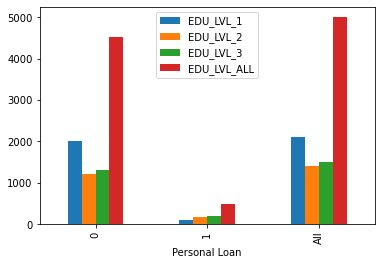

In [58]:
df_edu.plot(kind='bar');

### Data Insight 
As the level of education increases the chance customer taking the personal loan will be higher and therefore this can be one of the input for the modal creation

### EDA - Securities Account vs Personal Loan

In [59]:
df_sc_acc = pd.DataFrame(df_cust_info.pivot_table(columns = ['Securities Account'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True).to_records()).rename(columns={"('size', 'Mortgage', 0)":'SC_ACC_NOT_AVL',"('size', 'Mortgage', 1)":'SC_ACC_AVL',"('size', 'Mortgage', 'All')":'SC_ACC_TOTAL'})
df_sc_acc.set_index('Personal Loan')

SC_ACC_NOT_AVL  SC_ACC_AVL  SC_ACC_TOTAL
Personal Loan                                          
0                        4058         462          4520
1                         420          60           480
All                      4478         522          5000

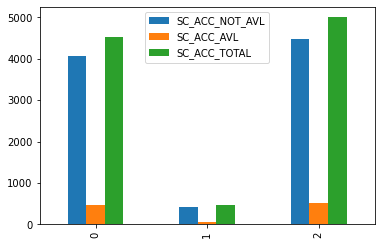

In [60]:
df_sc_acc.plot(kind='bar');

### Data Insight
Out of 522 Customer who has Securities Account, only 60 of them which is around 11.5% choose to have Personnel Loan. So, "Securities Account" properties on its own do not contributes towards much towards success criteria and may be ignored .

In [61]:
### EDA - CD Account vs Personal Loan

In [62]:
df_cd_acc = pd.DataFrame(df_cust_info.pivot_table(columns = ['CD Account'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True).to_records())
df_cd_acc.rename(columns = {"('size', 'Mortgage', 0)":"CD_ACC_NOT_AVL","('size', 'Mortgage', 1)":"CD_ACC_AVL","('size', 'Mortgage', 'All')":"CD_ACC_TOTAL"},inplace = True)
df_cd_acc.set_index('Personal Loan',inplace = True)
df_cd_acc

CD_ACC_NOT_AVL  CD_ACC_AVL  CD_ACC_TOTAL
Personal Loan                                          
0                        4358         162          4520
1                         340         140           480
All                      4698         302          5000

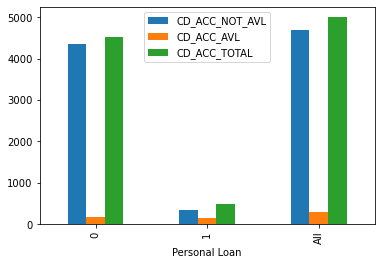

In [63]:
df_cd_acc.plot(kind='bar');

### Data Insight 
Out of 302 Customer who has CD Account, 140 of them which is around 46% choose to have Personnel Loan. So, "CD Account" properties is of helpul when building the model.

### EDA - Online vs Personal Loan

In [64]:
df_online = pd.DataFrame(df_cust_info.pivot_table(columns = ['Online'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True).to_records())
df_online.rename(columns = {"('size', 'Mortgage', 0)":"ONLN_NOT_AVL","('size', 'Mortgage', 1)":"ONLN_AVL","('size', 'Mortgage', 'All')":"ONLN_TOTAL"},inplace = True)
df_online.set_index('Personal Loan',inplace = True)
df_online

ONLN_NOT_AVL  ONLN_AVL  ONLN_TOTAL
Personal Loan                                    
0                      1827      2693        4520
1                       189       291         480
All                    2016      2984        5000

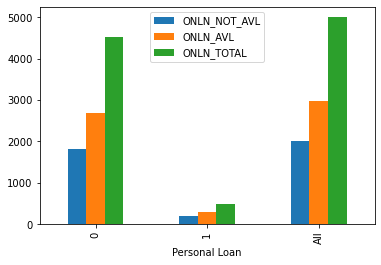

In [65]:
df_online.plot(kind='bar');

### EDA - Credit Card vs Personal Loan

In [66]:
df_cc = pd.DataFrame(df_cust_info.pivot_table(columns = ['CreditCard'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True).to_records())
df_cc.rename(columns = {"('size', 'Mortgage', 0)":"CC_NOT_AVL","('size', 'Mortgage', 1)":"CC_AVL","('size', 'Mortgage', 'All')":"CC_TOTAL"},inplace = True)
df_cc.set_index('Personal Loan',inplace = True)
df_cc

CC_NOT_AVL  CC_AVL  CC_TOTAL
Personal Loan                              
0                    3193    1327      4520
1                     337     143       480
All                  3530    1470      5000

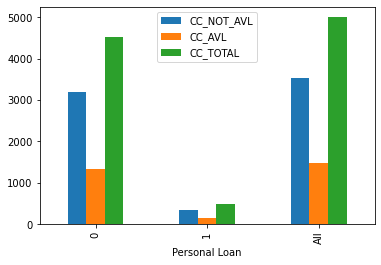

In [67]:
df_cc.plot(kind='bar');

### Data Insight 
The data is uniformly distributed over the different family size and seems to not contributing towards decision of taking Personal Loan

### EDA - Experience vs Personal Loan

In [68]:
df_exp = pd.DataFrame(df_cust_info.pivot_table(columns = ['Experience'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] ,fill_value = 0, margins = True).T.to_records()).drop(['level_0','level_1'],axis=1).rename(columns = {'0':'loan_denied','1':'loan_accepted'})
df_exp.drop(44,axis=0,inplace=True)
df_exp['Experience'] = df_exp['Experience'].astype('int64')
df_exp_cat = pd.cut(df_exp.Experience,bins = [-0.1,3,15,25,40,50],labels = ['Associate','Entry_Level','Mid_Level','Senior_Level','Executive'])
df_exp.insert(4,'Experience Group',df_exp_cat)
df_exp.groupby('Experience Group')['loan_accepted','All'].sum()

loan_accepted   All
Experience Group                     
Associate                    41   403
Entry_Level                 143  1467
Mid_Level                   126  1326
Senior_Level                163  1750
Executive                     7    54

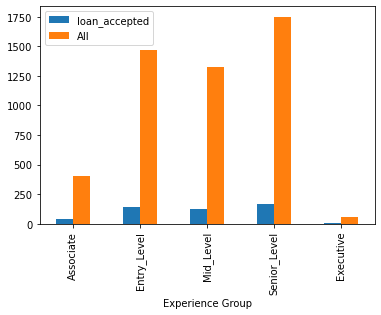

In [69]:
df_exp.groupby('Experience Group')['loan_accepted','All'].sum().plot(kind='bar');

In [70]:
df_age = pd.DataFrame(df_cust_info.pivot_table(columns = ['Age'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] ,fill_value = 0, margins = True).T.to_records()).drop(['level_0','level_1'],axis=1).rename(columns = {'0':'loan_denied','1':'loan_accepted'})
df_age.drop(45,axis=0,inplace=True)
df_age['Age'] = df_age['Age'].astype('int64')
df_age_cat = pd.cut(df_age.Age,bins = [20,29,39,49,59,69],labels = ['Twenties','Thirties','Fourties','Fifties','Sixties'])
df_age.insert(4,'Age Group',df_age_cat)

In [71]:
df_age_grp = df_age.groupby('Age Group')['loan_accepted','All'].sum()
df_age_grp['loan_accepted']/df_age_grp['All']

Age Group
Twenties    0.100410
Thirties    0.101844
Fourties    0.093079
Fifties     0.088456
Sixties     0.102374
dtype: float64

### Data Insight
With regards to Age, distribution of personal loan acceptance is uniformly distributed across the age band. So, Age properties can be dropped when doing linear regression

### EDA - CCAvg vs Personal Loan

In [72]:
df_CCAvg = pd.DataFrame(df_cust_info.pivot_table(columns = ['CCAvg'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] , margins = True,fill_value=0).T.to_records()).drop(['level_0','level_1'],axis=1)

In [73]:
df_CCAvg.drop(index = 108,inplace=True)

In [74]:
df_CCAvg['CCAvg'] = df_CCAvg['CCAvg'].astype('float64')
category = pd.cut(df_CCAvg.CCAvg,bins=[-0.1,5,7,10],labels=['Low','Medium','High'])
df_CCAvg.insert(4,'CCAvg Group',category)
df_CCAvg

CCAvg    0   1  All CCAvg Group
0     0.00  105   1  106         Low
1     0.10  181   2  183         Low
2     0.20  196   8  204         Low
3     0.30  235   6  241         Low
4     0.40  175   4  179         Low
5     0.50  155   8  163         Low
6     0.60  114   4  118         Low
7     0.67   18   0   18         Low
8     0.70  163   6  169         Low
9     0.75    9   0    9         Low
10    0.80  182   5  187         Low
11    0.90  103   3  106         Low
12    1.00  229   2  231         Low
13    1.10   77   7   84         Low
14    1.20   60   6   66         Low
15    1.30  121   7  128         Low
16    1.33    9   0    9         Low
17    1.40  131   5  136         Low
18    1.50  174   4  178         Low
19    1.60   98   3  101         Low
20    1.67   18   0   18         Low
21    1.70  154   4  158         Low
22    1.75    9   0    9         Low
23    1.80  149   3  152         Low
24    1.90  102   4  106         Low
25    2.00  184   4  188         Low
26    2.10   97   3  100         Low
27    2.20  123   7  130         Low
28    2.30   53   5   58         Low
29    2.33   18   0   18         Low
30    2.40   87   5   92         Low
31    2.50  105   2  107         Low
32    2.60   79   8   87         Low
33    2.67   36   0   36         Low
34    2.70   51   7   58         Low
35    2.75    0   1    1         Low
36    2.80  105   5  110         Low
37    2.90   45   9   54         Low
38    3.00   34  19   53         Low
39    3.10    8  12   20         Low
40    3.20   17   5   22         Low
41    3.25    0   1    1         Low
42    3.30   35  10   45         Low
43    3.33    0   1    1         Low
44    3.40   26  13   39         Low
45    3.50    9   6   15         Low
46    3.60   17  10   27         Low
47    3.67    0   1    1         Low
48    3.70   18   7   25         Low
49    3.80   33  10   43         Low
50    3.90   18   9   27         Low
51    4.00   26   7   33         Low
52    4.10    9  13   22         Low
53    4.20    0  11   11         Low
54    4.25    0   2    2         Low
55    4.30   18   8   26         Low
56    4.33    9   0    9         Low
57    4.40    9   8   17         Low
58    4.50   25   4   29         Low
59    4.60    8   6   14         Low
60    4.67    0   1    1         Low
61    4.70   17   7   24         Low
62    4.75    0   2    2         Low
63    4.80    0   7    7         Low
64    4.90   17   5   22         Low
65    5.00    9   9   18         Low
66    5.10    0   6    6      Medium
67    5.20    9   7   16      Medium
68    5.30    0   4    4      Medium
69    5.33    0   1    1      Medium
70    5.40    8  10   18      Medium
71    5.50    0   4    4      Medium
72    5.60    0   7    7      Medium
73    5.67    0   2    2      Medium
74    5.70    8   5   13      Medium
75    5.80    0   3    3      Medium
76    5.90    0   5    5      Medium
77    6.00   18   8   26      Medium
78    6.10    8   6   14      Medium
79    6.20    0   2    2      Medium
80    6.30    8   5   13      Medium
81    6.33    9   1   10      Medium
82    6.40    0   3    3      Medium
83    6.50    8  10   18      Medium
84    6.60    0   4    4      Medium
85    6.67    9   0    9      Medium
86    6.70    9   0    9      Medium
87    6.80    8   2   10      Medium
88    6.90    9   5   14      Medium
89    7.00    9   5   14      Medium
90    7.20    9   4   13        High
91    7.30    9   1   10        High
92    7.40    9   4   13        High
93    7.50    9   3   12        High
94    7.60    9   0    9        High
95    7.80    9   0    9        High
96    7.90    0   4    4        High
97    8.00    9   3   12        High
98    8.10    9   1   10        High
99    8.20    0   1    1        High
100   8.30    0   2    2        High
101   8.50    0   2    2        High
102   8.60    8   0    8        High
103   8.80    8   1    9        High
104   8.90    0   1    1        High
105   9.00    0   2    2        High
106   9.30    0   1    1        High
107  10.0

In [75]:
df_CCAvg_summ = df_CCAvg.groupby('CCAvg Group')['1','All'].sum()
df_CCAvg_summ['1']/df_CCAvg_summ['All']
# Looking at the result 
#df_CCAvg_summ

CCAvg Group
Low       0.073485
Medium    0.466667
High      0.272727
dtype: float64

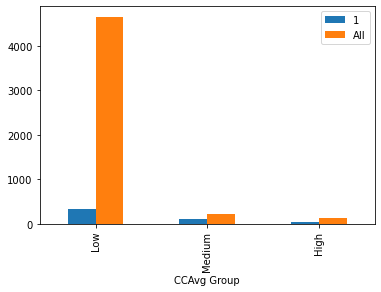

In [76]:
df_CCAvg_summ = df_CCAvg.groupby('CCAvg Group')['1','All'].sum().plot(kind='bar')

### Data Insight 
There is impact of CCAvg on the personal loan as who every has CC Average rating between 5 and 7, likely hood of accepting the personal loan is around 46.7% percentage 

In [77]:
df_income = pd.DataFrame(df_cust_info.pivot_table(columns = ['Income'], index=['Personal Loan'], values = ['Mortgage'], aggfunc=[np.size] ,fill_value = 0, margins = True).T.to_records()).drop(['level_0','level_1'],axis=1).rename(columns = {'0':'loan_denied','1':'loan_accepted'})
df_income.drop(162,axis=0,inplace=True)
df_income['Income'] = df_income['Income'].astype('int64')
df_income_cat = pd.cut(df_income.Income,bins = [0,50,100,150,200,250],labels = ['Between_0_50','Between_50_100','Between_100_150','Between_150_200','Between_200_250'])
df_income.insert(4,'Income Group',df_income_cat)
df_income

Income  loan_denied  loan_accepted  All     Income Group
0         8           23              0   23     Between_0_50
1         9           26              0   26     Between_0_50
2        10           23              0   23     Between_0_50
3        11           27              0   27     Between_0_50
4        12           30              0   30     Between_0_50
5        13           32              0   32     Between_0_50
6        14           31              0   31     Between_0_50
7        15           33              0   33     Between_0_50
8        18           53              0   53     Between_0_50
9        19           52              0   52     Between_0_50
10       20           47              0   47     Between_0_50
11       21           65              0   65     Between_0_50
12       22           65              0   65     Between_0_50
13       23           54              0   54     Between_0_50
14       24           47              0   47     Between_0_50
15       25           64              0   64     Between_0_50
16       28           63              0   63     Between_0_50
17       29           67              0   67     Between_0_50
18       30           63              0   63     Between_0_50
19       31           55              0   55     Between_0_50
20       32           58              0   58     Between_0_50
21       33           51              0   51     Between_0_50
22       34           53              0   53     Between_0_50
23       35           65              0   65     Between_0_50
24       38           84              0   84     Between_0_50
25       39           81              0   81     Between_0_50
26       40           78              0   78     Between_0_50
27       41           82              0   82     Between_0_50
28       42           77              0   77     Between_0_50
29       43           70              0   70     Between_0_50
30       44           85              0   85     Between_0_50
31       45           69              0   69     Between_0_50
32       48           44              0   44     Between_0_50
33       49           52              0   52     Between_0_50
34       50           45              0   45     Between_0_50
35       51           41              0   41   Between_50_100
36       52           47              0   47   Between_50_100
37       53           57              0   57   Between_50_100
38       54           52              0   52   Between_50_100
39       55           61              0   61   Between_50_100
40       58           55              0   55   Between_50_100
41       59           53              0   53   Between_50_100
42       60           51              1   52   Between_50_100
43       61           57              0   57   Between_50_100
44       62           55              0   55   Between_50_100
45       63           46              0   46   Between_50_100
46       64           59              1   60   Between_50_100
47       65           59              1   60   Between_50_100
48       68           35              0   35   Between_50_100
49       69           45              1   46   Between_50_100
50       70           47              0   47   Between_50_100
51       71           42              1   43   Between_50_100
52       72           41              0   41   Between_50_100
53       73           43              1   44   Between_50_100
54       74           45              0   45   Between_50_100
55       75           46              1   47   Between_50_100
56       78           61              0   61   Between_50_100
57       79           53              0   53   Between_50_100
58       80           56              0   56   Between_50_100
59       81           82              1   83   Between_50_100
60       82           60              1   61   Between_50_100
61       83           67              7   74   Between_50_100
62       84           62              1   63   Between_50_100
63       85           63             

In [78]:
df_income_grp = df_income.groupby('Income Group')['loan_accepted','All'].sum()
df_income_grp['loan_accepted']/df_income_grp['All']

Income Group
Between_0_50       0.000000
Between_50_100     0.022412
Between_100_150    0.285714
Between_150_200    0.504695
Between_200_250    0.187500
dtype: float64

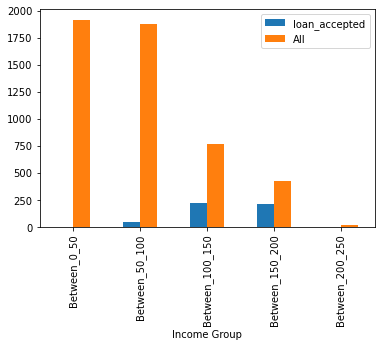

In [79]:
df_income_grp.plot(kind='bar');

### Data Insight
When the income is in between 100 and 200, there is high probablity customer accepting the personal loan. 

In [80]:
df_mortgage = pd.DataFrame(df_cust_info.pivot_table(columns = ['Mortgage'], index=['Personal Loan'], values = ['Income'], aggfunc=[np.size] ,fill_value = 0, margins = True).T.to_records()).drop(['level_0','level_1'],axis=1).rename(columns = {'0':'loan_denied','1':'loan_accepted'})
df_mortgage.drop(347,axis=0,inplace=True)
df_mortgage['Mortgage'] = df_mortgage['Mortgage'].astype('int64')
df_mortgage
df_mortgage_cat = pd.cut(df_mortgage.Mortgage,bins = [-0.1,100,200,300,400,500,600,700],labels = ['Between_0_100','Between_100_200','Between_300_400','Between_400_500','Between_500_600','Between_600_700','Between_700_800'])
df_mortgage.insert(4,'Mortgage Group',df_mortgage_cat)
df_mortgage

Mortgage  loan_denied  loan_accepted   All   Mortgage Group
0           0         3150            312  3462    Between_0_100
1          75            7              1     8    Between_0_100
2          76           11              1    12    Between_0_100
3          77            4              0     4    Between_0_100
4          78           15              0    15    Between_0_100
5          79           11              0    11    Between_0_100
6          80            7              0     7    Between_0_100
7          81           12              1    13    Between_0_100
8          82            9              1    10    Between_0_100
9          83           16              0    16    Between_0_100
10         84           10              1    11    Between_0_100
11         85            7              0     7    Between_0_100
12         86            9              2    11    Between_0_100
13         87           14              0    14    Between_0_100
14         88            8              1     9    Between_0_100
15         89           16              0    16    Between_0_100
16         90           15              0    15    Between_0_100
17         91           15              1    16    Between_0_100
18         92            4              0     4    Between_0_100
19         93            4              0     4    Between_0_100
20         94           13              1    14    Between_0_100
21         95           11              0    11    Between_0_100
22         96            7              0     7    Between_0_100
23         97           11              1    12    Between_0_100
24         98           17              0    17    Between_0_100
25         99            4              2     6    Between_0_100
26        100           12              0    12    Between_0_100
27        101           14              0    14  Between_100_200
28        102           15              0    15  Between_100_200
29        103           16              0    16  Between_100_200
30        104           14              0    14  Between_100_200
31        105            8              0     8  Between_100_200
32        106           11              2    13  Between_100_200
33        107            6              0     6  Between_100_200
34        108           10              0    10  Between_100_200
35        109           13              0    13  Between_100_200
36        110            8              0     8  Between_100_200
37        111            9              2    11  Between_100_200
38        112           13              0    13  Between_100_200
39        113           10              0    10  Between_100_200
40        114            8              0     8  Between_100_200
41        115            9              2    11  Between_100_200
42        116           13              0    13  Between_100_200
43        117           10              0    10  Between_100_200
44        118           13              1    14  Between_100_200
45        119           15              1    16  Between_100_200
46        120           10              2    12  Between_100_200
47        121           11              1    12  Between_100_200
48        122            8              0     8  Between_100_200
49        123            8              1     9  Between_100_200
50        124            7              0     7  Between_100_200
51        125            6              0     6  Between_100_200
52        126            7              0     7  Between_100_200
53        127            7              0     7  Between_100_200
54        128            9              0     9  Between_100_200
55        129            7              0     7  Between_100_200
56        130            6              0     6  Between_100_200
57        131           14              0    14  Between_100_200
58        132            7              1     8  Between_100_200
59        133            3              0     3  Between_100_200
60        134            5              

In [81]:
df_mortgage_grp = df_mortgage.groupby('Mortgage Group')['loan_accepted','All'].sum()
df_mortgage_grp_norm = pd.DataFrame(df_mortgage_grp['loan_accepted']/df_mortgage_grp['All'],columns=['Percentage'])
df_mortgage_grp_norm

Percentage
Mortgage Group             
Between_0_100      0.086806
Between_100_200    0.051451
Between_300_400    0.134680
Between_400_500    0.312500
Between_500_600    0.416667
Between_600_700    0.666667
Between_700_800    0.500000

<AxesSubplot:xlabel='Mortgage Group'>

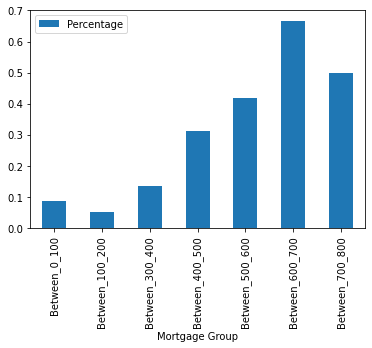

In [82]:
df_mortgage_grp_norm.plot(kind = 'bar')

<AxesSubplot:xlabel='Mortgage Group'>

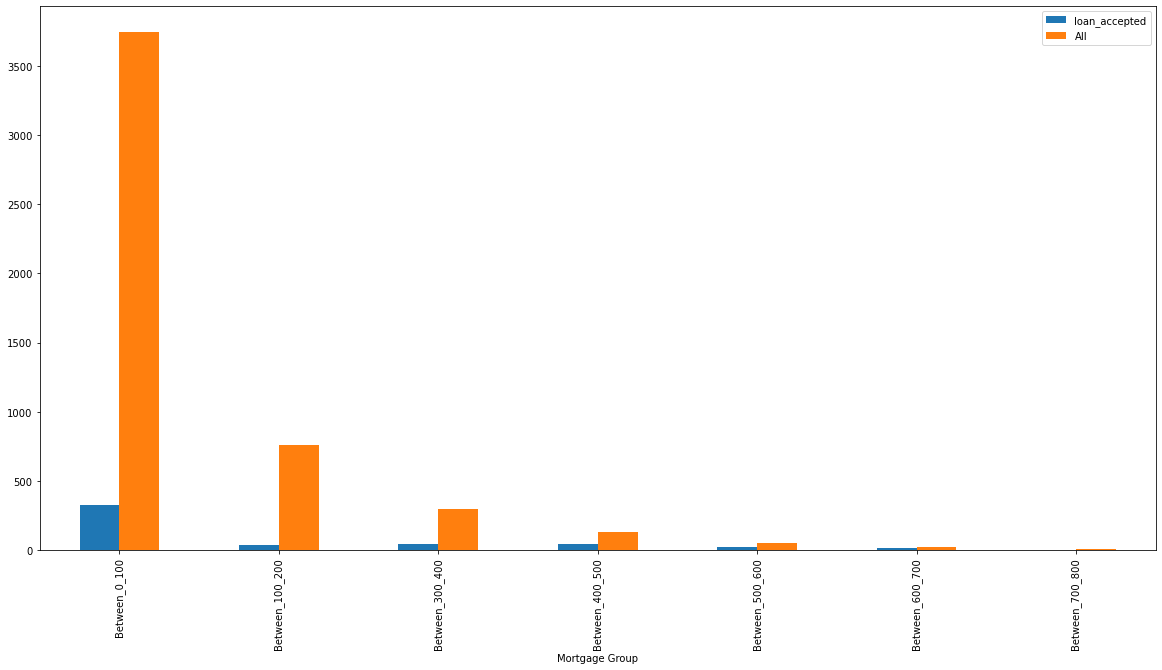

In [83]:
df_mortgage_grp.plot(kind='bar',figsize = (20,10))

### Bivariate Analysis Summary vs Personal Loan

| Property Name      | Whether property contributes towards Model Build | 
|--------------------|--------------------------------------------------|
| ID                 |        False                                     |
| Age                |        False                                     |
| Experience         |        False                                     |
| Income             |        True                                      |
| Zip Code           |        False                                     |
| Family             |        False                                     |
| CCAvg              |        True                                      |
| Education          |        True                                      |
| Mortgage           |        True                                      | 
| Securities Account |        False                                     |
| CD Account         |        True                                      |
| Online             |        False                                     |
| Credit Card        |        False                                     |



In [84]:
# Keeping the orginal dataframe as it is and creating a copy of it removing the attributes which are not required
df_log_reg = df_cust_info.copy()
df_log_reg.drop(['ID','Age','Experience','ZIP Code','Family','Securities Account','Online','CreditCard'],axis = 1,inplace = True)
df_log_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Income           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null category
Mortgage         5000 non-null int64
Personal Loan    5000 non-null category
CD Account       5000 non-null category
dtypes: category(3), float64(1), int64(2)
memory usage: 132.2 KB


## Model building using Logistic Regression from Sklearn

In [85]:
## Define X and Y variables
X = df_log_reg.drop('Personal Loan', axis=1)
Y = df_log_reg[['Personal Loan']]

In [86]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [87]:
X

Income  CCAvg  Mortgage  Education_2  Education_3  CD Account_1
0         49   1.60         0            0            0             0
1         34   1.50         0            0            0             0
2         11   1.00         0            0            0             0
3        100   2.70         0            1            0             0
4         45   1.00         0            1            0             0
5         29   0.40       155            1            0             0
6         72   1.50         0            1            0             0
7         22   0.30         0            0            1             0
8         81   0.60       104            1            0             0
9        180   8.90         0            0            1             0
10       105   2.40         0            0            1             0
11        45   0.10         0            1            0             0
12       114   3.80         0            0            1             0
13        40   2.50         0            1            0             0
14       112   2.00         0            0            0             0
15        22   1.50         0            0            1             0
16       130   4.70       134            0            1             0
17        81   2.40         0            0            0             0
18       193   8.10         0            0            1             0
19        21   0.50         0            1            0             0
20        25   0.90       111            1            0             0
21        63   2.00         0            0            1             0
22        62   1.20       260            0            0             0
23        43   0.70       163            0            0             0
24       152   3.90       159            0            0             0
25        29   0.50        97            0            0             0
26        83   0.20         0            0            1             0
27       158   2.40         0            0            0             0
28        48   2.20         0            0            1             0
29       119   3.30         0            1            0             1
30        35   1.20       122            0            1             0
31        29   2.00         0            1            0             0
32        41   0.60       193            0            1             0
33        18   0.90         0            0            1             0
34        50   1.80         0            0            1             0
35        81   0.70         0            0            0             0
36       121   2.90         0            0            0             0
37        71   1.40       198            0            1             0
38       141   5.00         0            0            1             1
39        80   0.70       285            0            1             0
40        84   1.60         0            0            1             0
41        60   2.30         0            0            0             0
42       132   1.10       412            1            0             0
43        45   0.70         0            0            0             0
44       104   5.70         0            0            0             0
45        52   2.50         0            0            0             0
46        43   0.70       153            1            0             0
47       194   0.20       211            0            1             1
48        81   4.50         0            0            1             0
49        49   1.80         0            0            0             0
50         8   0.70         0            1            0             0
51       131   2.90         0            0            0             0
52        72   0.10       207            0            0             0
53       190   2.10       240            0            1             0
54        44   0.20         0            0            1             0
55       139   8.00         0            0            0             0
56        29   0

## <a id = "link12"></a>Split the data into training and test set in the ratio of 70:30 respectively

In [88]:
##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [89]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

log_bank = LogisticRegression(random_state=7)

# fit the model on train data
log_bank.fit(X_train, y_train)                    

LogisticRegression(random_state=7)

In [90]:
y_predict = log_bank.predict(X_test)              # Predicting the target variable on test data

In [91]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed_Personal_Loan_Status'] = y_test
z['Predicted_Personal_Loan_Status'] = y_predict
z.head()

Income  CCAvg  Mortgage  Education_2  Education_3  CD Account_1  \
3406      34    2.0         0            0            1             0   
757       81    1.8         0            1            0             0   
3624      70    1.4         0            0            1             0   
4544      80    2.5         0            0            0             0   
3235      39    1.6         0            0            1             0   

      Observed_Personal_Loan_Status  Predicted_Personal_Loan_Status  
3406                              0                               0  
757                               0                               0  
3624                              0                               0  
4544                              0                               0  
3235                              0                               0

In [92]:
## function to get confusion matrix in a proper format
def draw_cnf_mat( actual, predicted ):
    cnf_mat = confusion_matrix( actual, predicted)
    fig, ax = plt.subplots(figsize=(11,7)) 
    ax.set_ylim([0,2])
    #akws = {"ha": 'left',"va": 'top'}
    sns.heatmap(cnf_mat, annot=True,  fmt= "d", xticklabels = [0,1] , yticklabels = [0,1] ,cmap="YlGnBu",linewidths= 1.5 , annot_kws={"size": 15} )
    plt.xticks([0.5,1.5],labels=[1,0])
    plt.yticks([0.5,1.5],labels=[1,0])
    plt.title('Confusion matrix')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.95
Testing accuracy 0.96

Confusion Matrix



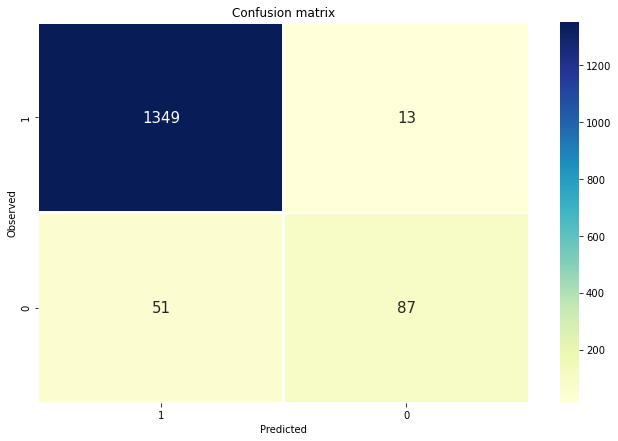


Recall: 0.63
Precision: 0.87
F1 Score: 0.73
Roc Auc Score: 0.81


In [93]:
print("Trainig accuracy",round(log_bank.score(X_train,y_train),2))  
print("Testing accuracy",round(log_bank.score(X_test, y_test),2))
print('\nConfusion Matrix\n')
draw_cnf_mat(y_test,y_predict);
print("\nRecall:",round(recall_score(y_test,y_predict),2))
print("Precision:",round(precision_score(y_test,y_predict),2))
print("F1 Score:",round(f1_score(y_test,y_predict),2))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),2))

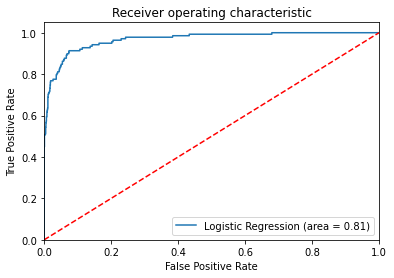

In [94]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_bank.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_bank.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## <a id = "link13"></a> Model Performance Evaluation Metrics

| Model Metrics     | Metrics Value          |
|-------------------|------------------------|
| Trainig accuracy  |  0.95                  |
| Testing accuracy  |  0.96                  |
| Recall            |  0.63                  |
| Precision         |  0.87                  |
| F1 Score          |  0.73                  |
| Roc Auc Score     |  0.81                  |

In [95]:
# Checking Parameters of logistic regression
log_bank.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## <a id = "link14"></a> Logistic Regression Parameter Evaluation on Model

### Evaluation of parameter "Solver" and "Penalty"

In [96]:
# all solver can be used with penaty as "l2" , only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score = []
test_score  = []

solver = ['liblinear','saga','newton-cg','lbfgs','sag']

for i in solver:
    bank_mdl = LogisticRegression(random_state = 42,penalty='l2', C = 0.75,solver = i)  # changing values of solver
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train, y_train),3))
    test_score.append(round(bank_mdl.score(X_test, y_test),3))
    
print("Solver list is                           :  ",solver)
print("\nTraining Score against respective solver :  ",train_score)
print("\nTesting Score against respective solver  :  ",test_score)

Solver list is                           :   ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag']

Training Score against respective solver :   [0.95, 0.902, 0.954, 0.954, 0.902]

Testing Score against respective solver  :   [0.955, 0.908, 0.957, 0.957, 0.908]


In [97]:
train_score = []
test_score =  []

solver = ['liblinear','saga']   # changing values of solver which works with 'l1'


for i in solver:
    bank_mdl = LogisticRegression(random_state = 42,penalty = 'l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train, y_train),3))
    test_score.append(round(bank_mdl.score(X_test, y_test),3))
    
print("Solver list is                           :  ",solver)
print("\nTraining Score against respective solver :  ",train_score)
print("\nTesting Score against respective solver  :  ",test_score)

Solver list is                           :   ['liblinear', 'saga']

Training Score against respective solver :   [0.955, 0.902]

Testing Score against respective solver  :   [0.957, 0.908]


### Data Insight 
Solver "liblinear" with penalty as "l1" as compared to rest of the solver when Training and Testing score of Data Model is being evaluated

### Evaluation of parameter "Class_weight" 

- with solver as "liblinear" and penalty as "l1" ( Which was better compared as seen above)

In [98]:
bank_mdl = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

bank_mdl.fit(X_train, y_train) 

y_predict = bank_mdl.predict(X_test)     

print("Trainig accuracy",bank_mdl.score(X_train,y_train),"\n")  
print("Testing accuracy",bank_mdl.score(X_test, y_test))

Trainig accuracy 0.888 

Testing accuracy 0.9053333333333333


### Data Insight 
Inclusion of the class weight as "Balanced" reduces the training and testing accuracy of the model. So, class_weight as "balanced" should not be used for the data modelling.


### Evaluation of parameter "Class_weight" vs inverse of regularization "C"


In [99]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    bank_mdl = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(bank_mdl.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print("Trainig Score",train_score)
print("Testing Score",test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
Trainig Score [0.837, 0.884, 0.887, 0.888, 0.888, 0.888]
Testing Score [0.849, 0.899, 0.902, 0.904, 0.905, 0.905]


In [100]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    bank_mdl = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(bank_mdl.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print("Trainig Score",train_score)
print("Testing Score",test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
Trainig Score [0.9, 0.946, 0.953, 0.955, 0.955, 0.956]
Testing Score [0.907, 0.951, 0.957, 0.957, 0.957, 0.958]


### Data Insight 

After the evaluation of Penalty, solver ,class_weight and inverse of regularization below are respective value against which model will perform better. 

1. Solver = liblinear
2. Inverse of Regularization C = 1
3. Penalty = l1
4. class_weight = None ( Meaning each classes has weight equal to 1 )  

### Final Model 

Trainig accuracy 0.956
Testing accuracy 0.958
Confusion Matrix


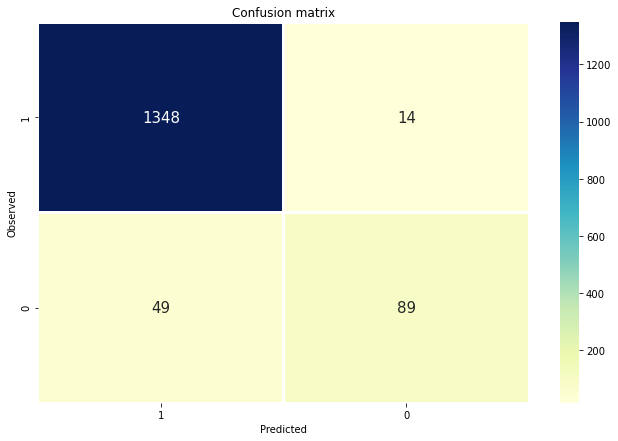


Recall: 0.644927536231884
Precision: 0.8640776699029126
F1 Score: 0.7385892116182573
Roc Auc Score: 0.8173242673817277


In [101]:
bank_mdl = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1) 
bank_mdl.fit(X_train, y_train)
y_predict = bank_mdl.predict(X_test)
print("Trainig accuracy",bank_mdl.score(X_train,y_train))  
print("Testing accuracy",bank_mdl.score(X_test, y_test))
print('Confusion Matrix')
draw_cnf_mat(y_test,y_predict)
print("\nRecall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## <a id = "link15"></a> Business Insight 

In order to predict the likelihood of a liability customer buying personal loans and increase the success ratio with a minimal budget, who ever bank reaches to likely of customer accepting the personal loan should be high. In terms of confusion matrix, below are the parameter 

True Positive  :- High 

False Positive :- Low

Above means "Precision" should be high. With above model that has been built there is around 86 percentage likelyhood among all the customer whom bank has marketed to has accepted Personal loan. Though the Zip Code has not been accounted for, but customer living in Bay area of San Francisco are more likely to accept personal loan

